<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Need)</span></div>

## 1 Random Numbers

### 1.1 Real and Pseudo Random Numbers

In [ ]:

# Your code here


### 1.2 NumPy’s PRNG

In [1]:
import numpy as np

np.random.rand()

0.2961916822180648

In [2]:
np.random.rand(10)            

array([0.22822717, 0.46506158, 0.59827954, 0.3202893 , 0.54612201,
       0.60696313, 0.41796516, 0.74231601, 0.04005191, 0.01391711])

In [3]:
np.random.rand(5,2)

array([[0.58148257, 0.83282735],
       [0.02370094, 0.4057494 ],
       [0.201523  , 0.9847419 ],
       [0.36415322, 0.4131143 ],
       [0.29279394, 0.27213137]])

In [4]:
n = 10000
random_numbers = np.random.rand(n)

np.sum(random_numbers < .5)/n*100


50.72

In [5]:
n = 10000
random_numbers = np.random.rand(n)

np.sum(random_numbers < .25)/n*100


25.34

In [6]:
n = 10000
random_numbers = np.random.rand(n)

np.sum(random_numbers < .75)/n*100

75.33999999999999

### 1.3 A simple graphical test

Text(0, 0.5, 'Value of random number')

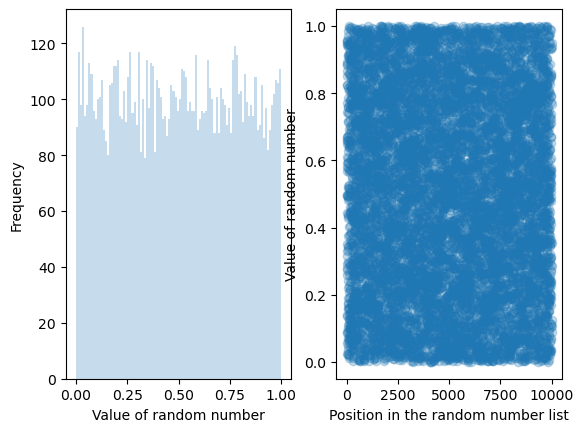

In [8]:
from matplotlib import pyplot as plt
n = 10000
random_numbers = np.random.rand(n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.4 Uniformly beyond \([0,1)\)

Text(0, 0.5, 'Value of random number')

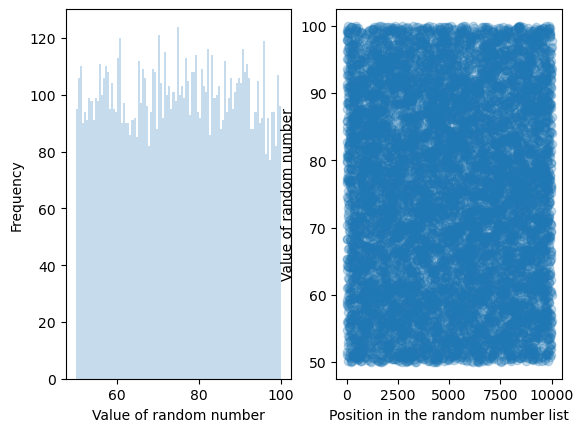

In [10]:
n = 10000
random_numbers = np.random.uniform(low=50, high=100, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.5 ‘seeding’ a PRNG

In [11]:
np.random.randint(0, 100, 10)

array([ 3,  5, 95, 20,  5, 99, 92, 31, 86, 34])

In [12]:
np.random.randint(0, 100, 10)

array([42, 38, 71, 51, 54, 54, 76, 98, 39,  6])

In [14]:
np.random.seed(1234)
np.random.randint(0,100,10)

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

In [15]:
np.random.seed(1234)
np.random.randint(0, 100, 10)     # Same ten integers between 0 and 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

## 2 Simulating a Magic-8 Ball

In [16]:
def shake_magic_8():
    options = ['It is certain.', 'It is decidedly so.',
               'Without a doubt.', 'Yes definitely.',
               'You may rely on it.', 'As I see it, yes.',
               'Most likely.', 'Outlook good.',
               'Yes.', 'Signs point to yes.',
               'Reply hazy, try again.', 'Ask again later.',
               'Better not tell you now.', 'Cannot predict now.',
               'Concentrate and ask again.', 'Don\'t count on it.',
               'My reply is no.', 'My sources say no.',
               'Outlook not so good.', 'Very doubtful.']
    return np.random.choice(options)

In [33]:
questions = ['Will I get A for SP2273?',
            'Will I have time to rest during recess week?',
            'Will Etho upload tomorrow?']

for question in questions:
    print(f'Q: {question}')
    print(f'A: {shake_magic_8()}\n')

Q: Will I get A for SP2273?
A: As I see it, yes.

Q: Will I have time to rest during recess week?
A: Cannot predict now.

Q: Will Etho upload tomorrow?
A: My reply is no.



## 3 Flipping Coins

### 3.1 A fair coin

In [25]:
np.random.choice(['Head', 'Tails'])

'Head'

In [26]:
no_of_coins = 10
np.random.choice(['Head', 'Tails'], no_of_coins)

array(['Tails', 'Tails', 'Tails', 'Head', 'Tails', 'Tails', 'Head',
       'Tails', 'Head', 'Tails'], dtype='<U5')

In [48]:
def flip_coins(no_of_coins=1, probability=.5):
    results = np.random.random (no_of_coins)
    no_of_heads = np.sum(results > probability)
    return no_of_heads

no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 52.60%


### 3.2 A biased coin

In [46]:
no_of_coins = 1000
no_of_heads = flip_coins(no_of_coins, probability = 0.3)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 70.80%


### 3.3 A flipping experiment

In [50]:
no_of_repeats = 10_000
result = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)]
no_of_heads, heads_counts = np.unique(result, return_counts=True)
heads_probability = heads_counts/no_of_repeats

In [54]:
pip install scipy

     ---------------------------------------- 42.5/42.5 MB 5.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


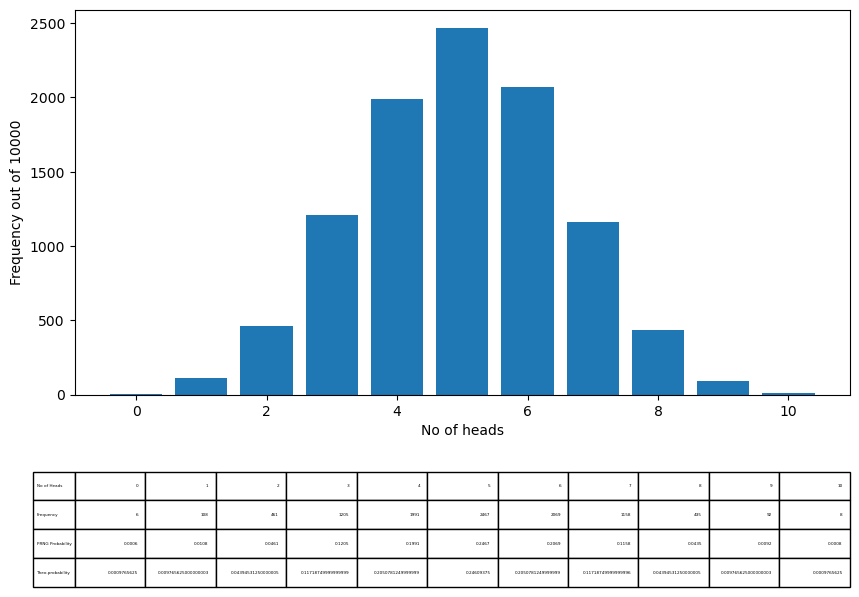

In [56]:
plt.rcParams['figure.figsize'] = (10,5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability, binomial_probabilities],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability', 'Theo.probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])

from scipy.stats import binom
binom.pmf(k=7, n=10, p=.5)
binomial_probabilities = binom.pmf(k=no_of_heads, n=10, p=.5)

## Exercise 1 :  12C, 13C

In [7]:
n = 27 
p = .0111 

mean = n * p
print("Mean number of 13C atoms:", mean)

sd = (n * p * (1 - p)) ** .5
print("Standard deviation of 13C atoms:", sd)

Mean number of 13C atoms: 0.2997
Standard deviation of 13C atoms: 0.5444018093283673


In [9]:
prob_zero_13C = (1 - p) ** n
print("Probability of no 13C atoms:", prob_zero_13C)

Probability of no 13C atoms: 0.7397997429318266
